# ATM Transactions Analytics & Visualization with Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error, r2_score
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")

In [2]:
import pandas as pd

file_path = r"/Users/akashkumar/Desktop/DA/ATM Transactions Dashboard & Analytics with Power BI and Python/BOB_Dataset.xlsx"

# Loading Excel
xls = pd.ExcelFile(file_path)

print("Available Sheets:", xls.sheet_names)

df = pd.read_excel(file_path, sheet_name=xls.sheet_names[0])
df.head()

Available Sheets: ['Sheet1']


,Year,Month,BANK,ATM id,STATE,Effective days,Fin Txn,Non Fin Txn,Monthly Txn,AVG Fin Txn,...,TXN RANGE Current Month,TXN RANGE Previous Month,TXN RANGE Previous 2nd Month,Current Margin Range Above/Below 0%,Previous Month Margin Range Above/Below 0%,Previous 2nd Month Margin Range Above/Below 0%,Previous 3rd Month Margin Range Above/Below 0%,Category,Revenue Performance,Up Time
0,2024,4889-11-07 00:00:00,BOB,TSFTSK000969151,Assam,30,3814,1464,5278,127,...,175 200,125 150,150 175,Above 0%,Above 0%,Below 0%,Above 0%,NaN,Above 50K,0.93
1,2024,4889-11-07 00:00:00,BOB,TSFTSK000969154,Assam,30,2315,803,3118,77,...,100 125,50 75,175 200,Below 0%,Below 0%,Below 0%,Above 0%,NaN,35K 40K,0.46
2,2024,4889-11-07 00:00:00,BOB,TSFTSK000969152,Assam,30,3008,928,3936,100,...,125 150,100 125,75 100,Above 0%,Above 0%,Below 0%,Below 0%,NaN,40K 50K,0.93
3,2024,4889-11-07 00:00:00,BOB,TSFTSK000971358,Assam,30,2424,605,3029,81,...,100 125,75 100,50 75,Above 0%,Above 0%,Above 0%,Below 0%,NaN,35K 40K,1.00
4,2024,4889-11-07 00:00:00,BOB,TSFTSK000971362,Assam,30,1632,299,1931,54,...,50 75,75 100,75 100,Below 0%,Below 0%,Below 0%,Below 0%,NaN,20K 25K,0.73


In [3]:
# Dataset overview
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
df.info()

# Missing values
df.isnull().sum()

Shape: (11076, 53)

Columns: ['Year', 'Month', 'BANK', 'ATM id', 'STATE', 'Effective days', 'Fin Txn', 'Non Fin Txn', 'Monthly Txn', 'AVG Fin Txn', 'AVG Non Fin Txn', 'AVG Total TXN', 'Monthly Rev', 'MHA Revenue', 'ATM Rev Total', 'CRA', 'MHA Cost', 'Spare Rep. (SLM)\n (AssetOEM)', 'Site Maint\n (Non Asset)', 'Spare Rep.(AC)', 'Spare Rep.(UPS)', 'Onetime Cost', 'FLM', 'SUPPLIES', 'UPS AMC', 'ATM AMC', 'VSAT AMC', 'BW + BCKHL', 'ESURVEILLANCE', 'HK', 'SUD', ' EBILL ', 'RENT', 'Insurance', '  EJ ', 'Compensation', 'Penalty', ' Total Cost  ', ' Gross Profit ', 'GROSS PROFIT %', 'Quarter', 'ATM TYPE', 'MARGIN RANGE Current Month', 'TXN RANGE Current Month', 'TXN RANGE Previous Month', 'TXN RANGE Previous 2nd Month', 'Current Margin Range Above/Below 0%', 'Previous Month Margin Range Above/Below 0%', 'Previous 2nd Month Margin Range Above/Below 0%', 'Previous 3rd Month Margin Range Above/Below 0%', 'Category', 'Revenue Performance', 'Up Time']

Info:
<class 'pandas.core.frame.DataFrame'>
Ra

Year                                                  0
Month                                                 0
BANK                                                  0
ATM id                                                0
STATE                                                 0
Effective days                                        0
Fin Txn                                               0
Non Fin Txn                                           0
Monthly Txn                                           0
AVG Fin Txn                                           0
AVG Non Fin Txn                                       0
AVG Total TXN                                         0
Monthly Rev                                           0
MHA Revenue                                           0
ATM Rev Total                                         0
CRA                                                   0
MHA Cost                                          11076
Spare Rep. (SLM)\n (AssetOEM)                   

## Dataset Overview Insights

- The dataset contains **11,076 rows** and **53 columns**, which indicates a large-scale collection of Automated Teller Machine (ATM) transaction and cost records.  
- The columns cover a wide range of details, including **transaction counts, revenues, costs, gross profit, state, bank, quarter, and uptime**, providing a holistic view of ATM performance.  
- Data types show that most columns are stored as **object (text)**, while some key financial metrics are **integers or floating-point numbers**. These will need to be converted into numerical values for analysis.

# Exploratory Data Analysis (EDA)

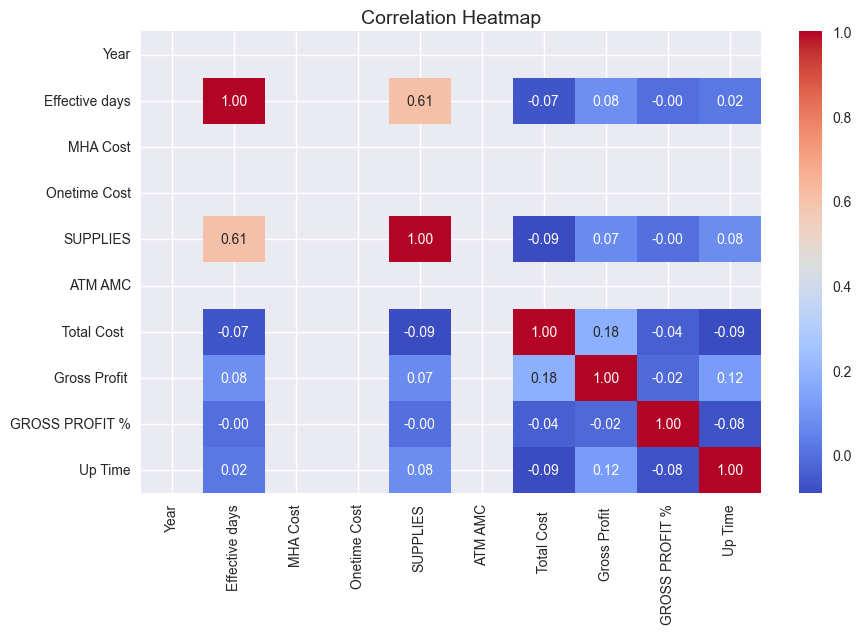

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=["number"])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

### Correlation Heatmap  

The heatmap above shows the correlation between different **numeric features** in the ATM transaction dataset.  
- A **positive correlation** (closer to `+1.0`) means two variables increase together.  
- A **negative correlation** (closer to `-1.0`) means one decreases while the other increases.  
- Values near `0` indicate **weak or no correlation**.  

### This helps us quickly identify:  
1. Which factors are strongly related to **transaction counts or costs**.  
2. Whether certain **fee structures** are linked to **transaction volumes**.  
3. Potential **multicollinearity** (variables too closely related, which may affect predictive modeling).  

# Revenue & Cost Analysis

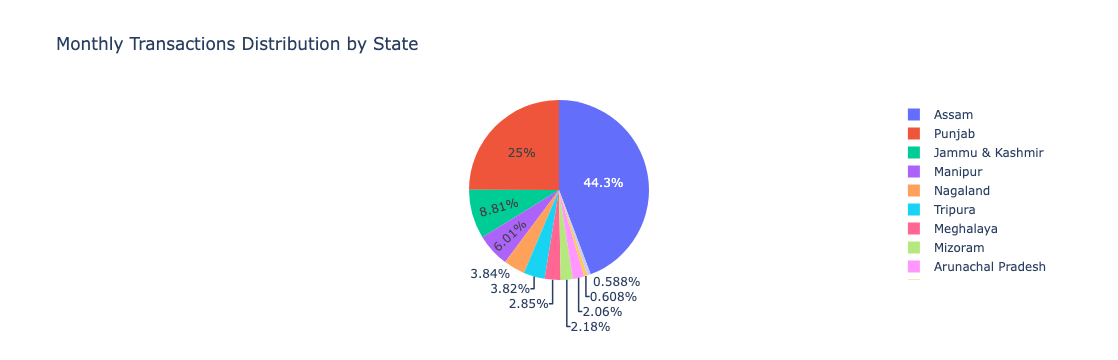

In [6]:
import pandas as pd
import plotly.express as px

# Cleanning column names
df.columns = df.columns.str.strip().str.lower()

# Ensuring 'monthly txn' 
if "state" in df.columns and "monthly txn" in df.columns:
    df["monthly txn"] = pd.to_numeric(df["monthly txn"], errors="coerce")  # convert invalid values to NaN

    # Dropping rows with missing 'monthly txn' or 'state'
    df_clean = df.dropna(subset=["monthly txn", "state"])

    # Aggregate monthly transactions by state
    state_summary = df_clean.groupby("state")["monthly txn"].sum().reset_index()

    # 1: Plot interactive pie chart
    fig = px.pie(
        state_summary,
        names="state",
        values="monthly txn",
        title="Monthly Transactions Distribution by State"
    )
    fig.show()

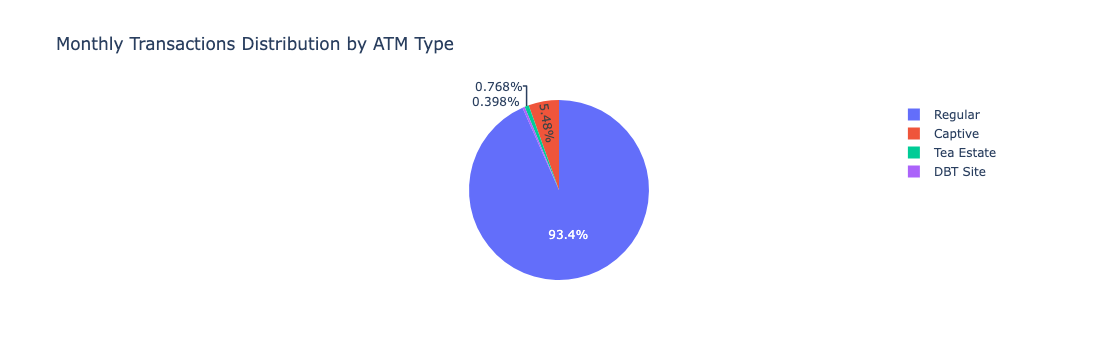

In [7]:
# 2) Monthly Txn by ATM Type
if "atm type" in df.columns and "monthly txn" in df.columns:
    atm_summary = df.groupby("atm type")["monthly txn"].sum().reset_index()
    fig = px.pie(atm_summary, names="atm type", values="monthly txn",
                 title="Monthly Transactions Distribution by ATM Type")
    fig.show()

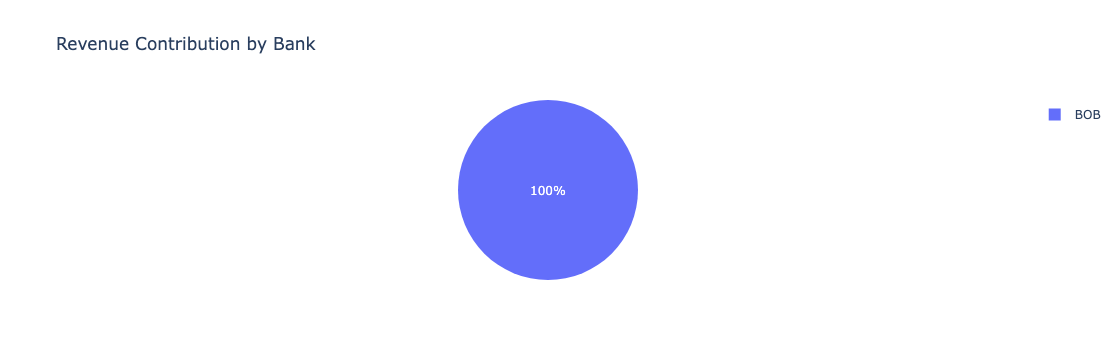

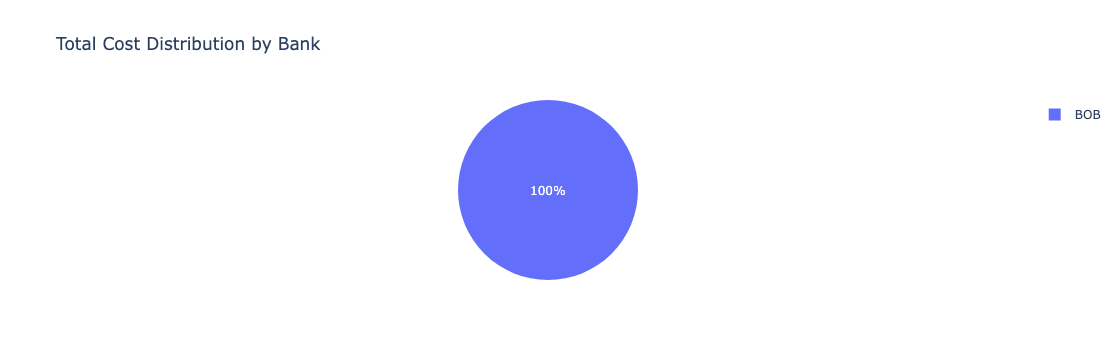

In [8]:
# Revenue by Bank
if "bank" in df.columns and "monthly rev" in df.columns:
    df["monthly rev"] = pd.to_numeric(df["monthly rev"], errors="coerce") 
    bank_summary = df.groupby("bank")["monthly rev"].sum().reset_index()
    fig = px.pie(
        bank_summary,
        names="bank",
        values="monthly rev",
        title="Revenue Contribution by Bank"
    )
    fig.show()
    
# Cost by Bank 
if "total cost" in df.columns and "bank" in df.columns:
    df["total cost"] = pd.to_numeric(df["total cost"], errors="coerce")  
    cost_summary = df.groupby("bank")["total cost"].sum().reset_index()

    fig = px.pie(
        cost_summary,
        names="bank",
        values="total cost",
        title="Total Cost Distribution by Bank"
    )
    fig.show()

# Correlation Analysis of Transactions, Costs, and Gross Profit

This analysis explores the relationships between different types of transactions, total costs, and **gross profit**. Two visualizations are used:

1. **Correlation Heatmap** – Shows pairwise correlations between features (`monthly txn`, `fin txn`, `non fin txn`, `total cost`, `gross profit`) using Seaborn.  
2. **Interactive Bar Chart** – Highlights how strongly each feature correlates with **gross profit**, making it easier to identify the most impactful factors.

The goal is to understand which metrics positively or negatively influence gross profit and to gain actionable insights for decision-making.

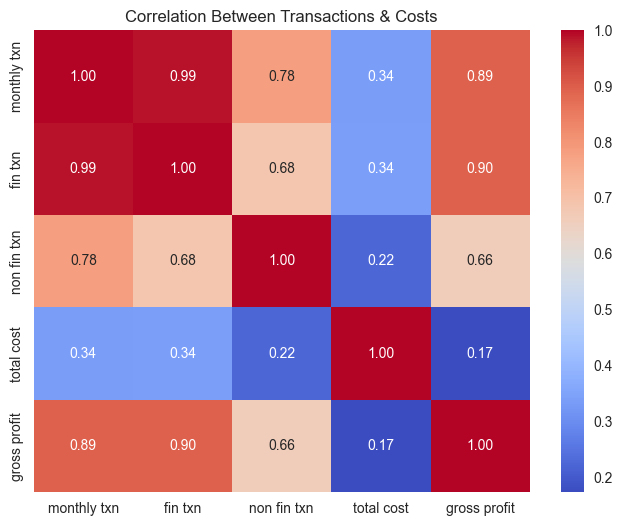

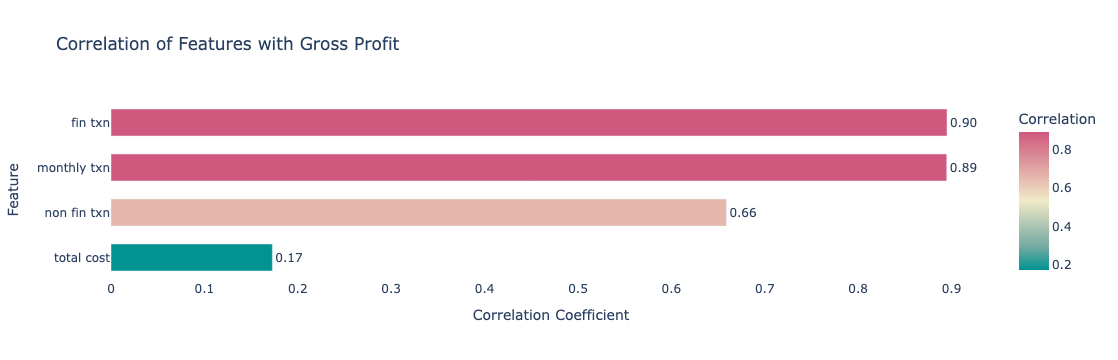

In [10]:
# Selecting relevant columns
corr_cols = ["monthly txn", "fin txn", "non fin txn", "total cost", "gross profit"]
corr_df = df[corr_cols].apply(pd.to_numeric, errors="coerce").dropna()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Transactions & Costs")
plt.show()

# Correlation with Gross Profit
target_corr = corr_df.corr()["gross profit"].drop("gross profit").reset_index()
target_corr.columns = ["Feature", "Correlation"]

# Interactive bar chart
fig = px.bar(
    target_corr.sort_values("Correlation", ascending=True),
    x="Correlation",
    y="Feature",
    orientation="h",
    title="Correlation of Features with Gross Profit",
    color="Correlation",
    color_continuous_scale=px.colors.diverging.Tealrose,  # better contrasting colors
    text="Correlation"
)

fig.update_traces(texttemplate="%{text:.2f}", textposition="outside")
fig.update_layout(
    xaxis=dict(title="Correlation Coefficient"),
    yaxis=dict(title="Feature"),
    bargap=0.4,
    plot_bgcolor="white"
)

fig.show()

## Key Insights

### 1. Strength and Direction of Relationships
- Correlation coefficients range from **-1 to 1**.  
- **Positive values** indicate that as the feature increases, gross profit tends to increase.  
- **Negative values** indicate that as the feature increases, gross profit tends to decrease.
---
### 2. Correlations 

| Feature       | Correlation with Gross Profit |
|---------------|------------------------------|
| Monthly txn   | 0.89 (Strong positive)       |
| Fin txn       | 0.90 (Strong positive)     |
| Non-fin txn   | 0.66 (Moderate positive)         |
| Total cost    | 0.17 (Weak positive)    |

- **Monthly transactions** have the strongest positive impact on gross profit.  
- **Total cost** has a negative correlation, suggesting that higher costs reduce profitability.  
- **Non-financial transactions** have minimal effect on gross profit.
---
### 3. Visual Highlights
- **Heatmap** quickly shows relationships between all features. Dark red/blue indicates strong correlations.  
- **Interactive bar chart** allows hovering over bars to see exact correlation values. The diverging color scale (Tealrose) differentiates positive vs negative correlations visually.

# Performance Segmentation (Clustering ATMs)

This analysis segments ATMs based on key performance metrics using **KMeans clustering**. ATMs are grouped into three categories:

- **Low Performance**
- **Medium Performance**
- **High Performance**

Two visualizations are used:

1. **Scatter Chart** – Shows the relationship between **monthly transactions** and **gross profit**. Bubble size represents **total cost**, and color indicates the performance cluster.  
2. **Pie Chart** – Shows the **proportion of ATMs** in each performance cluster, providing a quick overview of cluster distribution.

The segmentation helps identify high-performing ATMs, underperforming ATMs, and ATMs with potential for optimization.

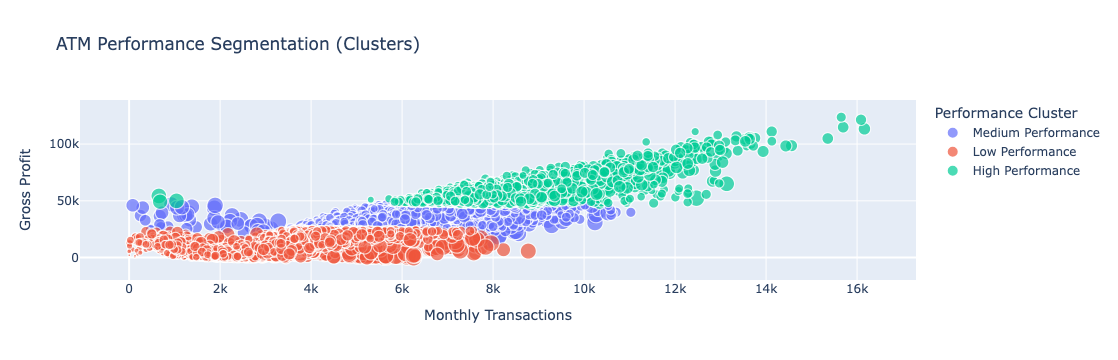

In [12]:
# Selecting features for clustering
features = ["monthly txn", "total cost", "gross profit"]
clustering_df = df[features].apply(pd.to_numeric, errors="coerce").dropna()

# KMeans clustering without scaling
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clustering_df["cluster"] = kmeans.fit_predict(clustering_df)

# Mapping cluster numbers to performance labels
cluster_labels = {0: "Low Performance", 1: "Medium Performance", 2: "High Performance"}
clustering_df["Cluster_Label"] = clustering_df["cluster"].map(cluster_labels)

# Scatter plot
fig_scatter = px.scatter(
    clustering_df,
    x="monthly txn",
    y="gross profit",
    color="Cluster_Label",
    size="total cost",
    title="ATM Performance Segmentation (Clusters)",
    labels={
        "monthly txn": "Monthly Transactions",
        "gross profit": "Gross Profit",
        "Cluster_Label": "Performance Cluster"
    }
)
fig_scatter.show()

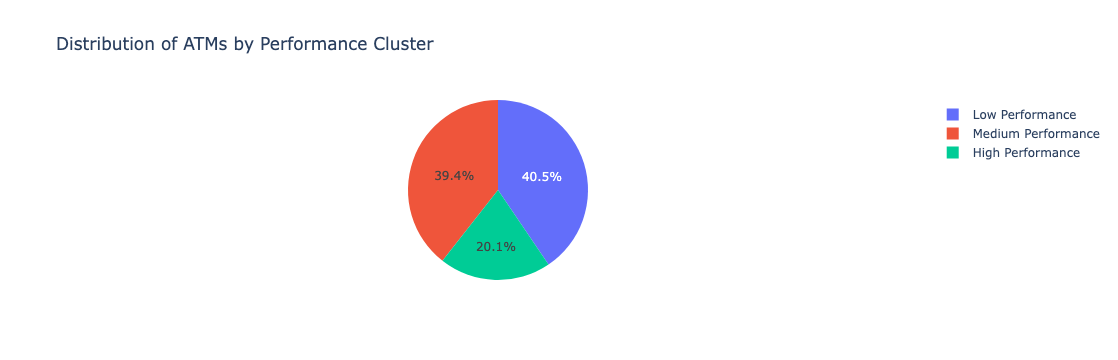

In [14]:
cluster_counts = clustering_df["Cluster_Label"].value_counts().reset_index()
cluster_counts.columns = ["Performance Cluster", "Count"]

cluster_colors = {
    "Low Performance": "#636EFA",    
    "Medium Performance": "#EF553B",  
    "High Performance": "#00CC96"     
}

# Pie chart
fig_pie = px.pie(
    cluster_counts,
    names="Performance Cluster",
    values="Count",
    title="Distribution of ATMs by Performance Cluster",
    color="Performance Cluster",
    color_discrete_map=cluster_colors,  # use the same colors as scatter plot
    labels={"Performance Cluster": "ATM Cluster", "Count": "Number of ATMs"}
)

fig_pie.show()

# ATM Anomaly Detection (Fraud / Inefficiency)

This analysis identifies **anomalous ATMs** using the **Isolation Forest** algorithm. The goal is to detect ATMs that deviate from expected behavior in terms of **gross profit**, **monthly transactions**, and **total cost**, which may indicate inefficiency or potential fraud.  

An **interactive bar chart** is used to visualize ATM performance, with **custom colors** to differentiate normal and anomalous ATMs.

---

- **Normal ATMs** (blue)  
  ATMs classified as Normal operate within expected ranges. Their metrics—monthly transactions, total cost, and gross profit—are consistent with typical ATM behavior, indicating stable and efficient performance.

- **Anomalous ATMs** (red)  
  ATMs classified as Anomalous exhibit unusual behavior in one or more key metrics. This may include:  
  - Extremely high or low gross profit  
  - Disproportionately high operational costs  
  - Abnormal transaction volumes  

These ATMs are flagged for further investigation as they may indicate **fraud or operational inefficiency**.

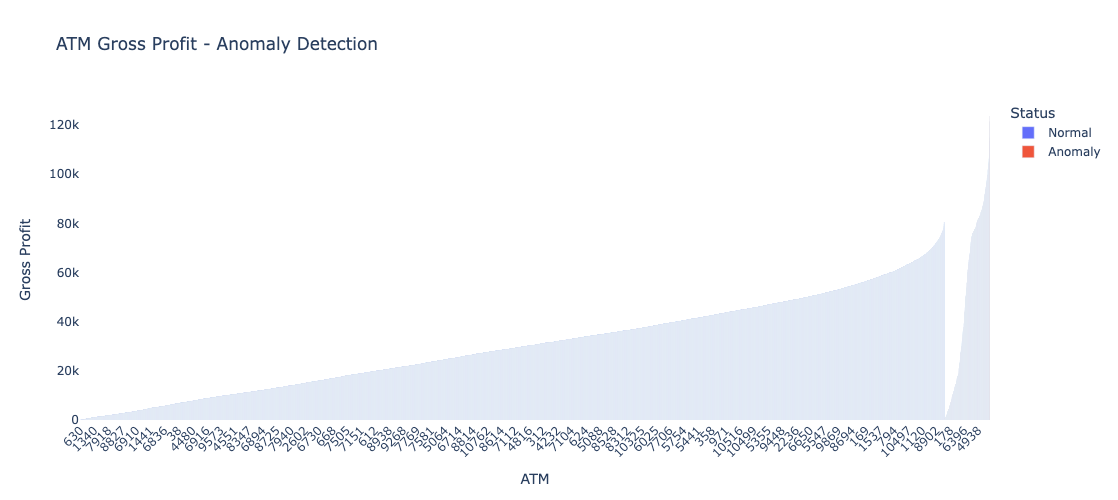

In [16]:
# Selecting relevant numeric columns
anom_cols = ["monthly txn", "total cost", "gross profit"]
anom_df = df[anom_cols].apply(pd.to_numeric, errors="coerce").dropna()

# Detecting anomalies
iso = IsolationForest(contamination=0.05, random_state=42)
anom_df["anomaly"] = iso.fit_predict(anom_df)
anom_df["anomaly"] = anom_df["anomaly"].map({1: "Normal", -1: "Anomaly"})

# Adding an ATM identifier (just use index if actual IDs are not available)
anom_df["ATM_ID"] = anom_df.index.astype(str)

# Defining colors for the bar chart
colors = {"Normal": "#636EFA", "Anomaly": "#EF553B"}  # Blue = Normal, Red = Anomaly

# Interactive bar chart
fig_bar = px.bar(
    anom_df.sort_values("gross profit"),
    x="ATM_ID",
    y="gross profit",
    color="anomaly",
    color_discrete_map=colors,
    title="ATM Gross Profit - Anomaly Detection",
    labels={"ATM_ID": "ATM", "gross profit": "Gross Profit", "anomaly": "Status"},
    hover_data=["monthly txn", "total cost"]
)
fig_bar.update_layout(
    xaxis_tickangle=-45,
    plot_bgcolor="white",
    width=900,
    height=500
)

fig_bar.show()

## Key Insights

1. **Identifying Outliers**
   - Red bars in the chart indicate anomalous ATMs.  
   - Hovering over each bar shows detailed metrics, including monthly transactions and total cost, helping pinpoint the cause of anomalies.
---

2. **Patterns & Observations**
   - Some anomalies have **high costs but low profit**, suggesting operational inefficiency.  
   - Others have **abnormal transaction volumes**, which could indicate fraudulent activity.  
   - Most ATMs (blue bars) perform normally, following expected operational patterns.

---
3. **Benefits of This Approach**
   - Interactive visualization allows quick identification of anomalies.
   -  Color coding provides immediate visual differentiation between normal and anomalous ATMs.
   - Supports data-driven operational and fraud-prevention decisions.

# Scenario Simulations

Cash Replenishment Agent (CRA) Cost Reduction

This simulation evaluates the impact of a **10% reduction in CRA (Cash Replenishment Agent) costs** on the overall ATM operating costs per bank.  
**CRA:** A **Cash Replenishment Agent** is responsible for transporting and loading cash into ATMs. CRA costs are a significant part of ATM operational expenses.

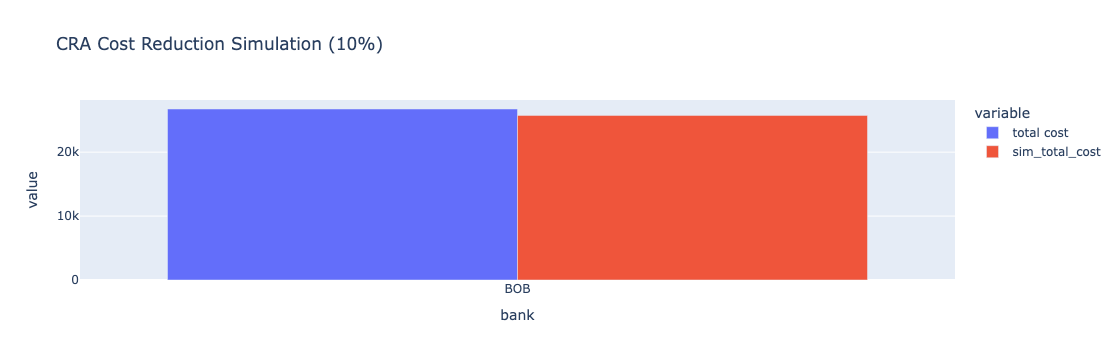

In [17]:
if "cra" in df.columns and "total cost" in df.columns:
    df["cra"] = pd.to_numeric(df["cra"], errors="coerce")
    df["total cost"] = pd.to_numeric(df["total cost"], errors="coerce")
    
    # Scenario: 10% CRA cost reduction
    df["sim_total_cost"] = df["total cost"] - (0.1 * df["cra"])
    
    fig = px.bar(
        df.groupby("bank")[["total cost", "sim_total_cost"]].mean().reset_index(),
        x="bank",
        y=["total cost", "sim_total_cost"],
        barmode="group",
        title="CRA Cost Reduction Simulation (10%)"
    )
    fig.show()

**Insights:**  
- The bar chart shows **average total cost per bank** under current and simulated scenarios.  
- Banks with **higher CRA costs** will see the **largest reduction in total cost** after the simulation.  
- Helps identify **high-impact banks** where CRA cost optimization can improve profitability.

**Visualization:**  
The interactive bar chart below compares current total cost and simulated total cost after a 10% CRA reduction

# Uptime vs Gross Profit Analysis

This analysis evaluates the relationship between **ATM uptime** and **gross profit** across different banks.  
- **Uptime:** Measures the operational availability of ATMs.  
- **Gross Profit:** Revenue generated after deducting costs.  

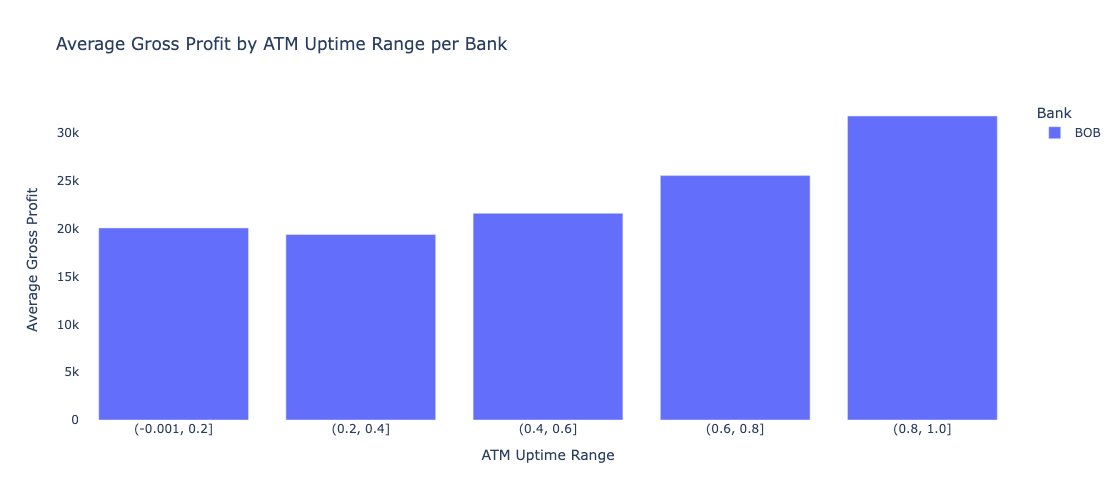

In [20]:
import pandas as pd
import plotly.express as px

# Making sure 'up time', 'gross profit', and 'bank' columns exist
if all(col in df.columns for col in ["up time", "gross profit", "bank"]):

    # Creating a new dataframe with relevant columns
    df_plot = df[["up time", "gross profit", "bank"]].copy()
    
    # Creating bins for uptime to group ATMs by uptime range
    df_plot["uptime_bin"] = pd.cut(df_plot["up time"], bins=5)
    
    # Converting the interval bins to string for plotting
    df_plot["uptime_bin_str"] = df_plot["uptime_bin"].astype(str)
    
    # Groupping by bank and uptime range, calculate average gross profit
    grouped = df_plot.groupby(["bank", "uptime_bin_str"])["gross profit"].mean().reset_index()
    
    # Interactive bar chart
    fig_bar = px.bar(
        grouped,
        x="uptime_bin_str",       
        y="gross profit",          
        color="bank",            
        barmode="group",           
        title="Average Gross Profit by ATM Uptime Range per Bank",
        labels={
            "uptime_bin_str": "ATM Uptime Range",
            "gross profit": "Average Gross Profit",
            "bank": "Bank"
        },
        hover_data=["gross profit"]  
    )
    fig_bar.update_layout(
        plot_bgcolor="white",
        width=900,
        height=500
    )
    fig_bar.show()

**Insights:**  
- Banks with ATMs in the **higher uptime ranges** generally show **higher gross profit**, highlighting the importance of operational efficiency.  
- The chart allows quick identification of **underperforming uptime ranges** for each bank, useful for **targeted maintenance or resource allocation**.  
- Helps prioritize ATMs or banks where **improving uptime** could result in significant profitability gains.

# Best Performing State by ATM Profitability and Revenue

This analysis identifies the **state that generates the highest total gross profit** from all ATMs and provides insight into its total revenue contribution.  
- **Gross Profit:** Revenue minus operational costs for ATMs in the state.  
- **Total Revenue:** Sum of all revenue generated by ATMs in the state.  

In [21]:
summary = {}

# Ensuring relevant columns exist
if all(col in df.columns for col in ["state", "gross profit", "monthly rev"]):
    # Convert to numeric
    df["gross profit"] = pd.to_numeric(df["gross profit"], errors="coerce")
    df["monthly rev"] = pd.to_numeric(df["monthly rev"], errors="coerce")
    
    # Group by state
    state_summary = df.groupby("state").agg(
        total_gross_profit=("gross profit", "sum"),
        total_revenue=("monthly rev", "sum")
    ).reset_index()
    
    # Best performing state by gross profit
    best_state_row = state_summary.loc[state_summary["total_gross_profit"].idxmax()]
    
    # Format numbers with commas
    summary["Best Performing State"] = best_state_row["state"]
    summary["State Gross Profit"] = f"₹ {best_state_row['total_gross_profit']:,.0f}"
    summary["State Total Revenue"] = f"₹ {best_state_row['total_revenue']:,.0f}"

summary

{'Best Performing State': 'Assam',
 'State Gross Profit': '₹ 161,037,181',
 'State Total Revenue': '₹ 261,174,535'}

**Insights:**  
- **Best Performing State:** Assam  
- **Total Gross Profit:** ₹ 161,037,181  
- **Total Revenue:** ₹ 261,174,535  
  
- Assam is the **key driver of profitability**, with the highest gross profit among all states.  
- The high total revenue alongside gross profit indicates **efficient ATM operations and strong transaction volumes**.  
- This insight helps prioritize **resource allocation, maintenance, and growth strategies** in high-performing regions.